In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df_origin = pd.read_csv('../data_volume/estado_df.csv', ';')
df_origin.head(3)

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds
0,69876967-a953-4ea9-ad4c-e77955ebb0d3-i0b0,d0186c353a471a7e6db313ab95099e718bacba728603a8...,41,1979-03-10,F,3,PARDA,530010.0,10.0,BRASILIA,...,Trabalhadores de Saúde,210013,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-22T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-23 12:24:47
1,d1985fbd-1a62-423f-8006-9d502ae25411-i0b0,7fec579b3c261e56a4c6394e1d36eb50054d6363d3eb4f...,47,1973-05-20,F,1,BRANCA,530010.0,10.0,BRASILIA,...,Trabalhadores de Saúde,202010036,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-19T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-03-22 16:34:46
2,7fe4757a-04b1-4ac1-8bc9-1c227632f430-i0b0,de590f56bfff4d4c38de14ee02693a61bf547f2939b799...,42,1978-05-15,F,1,BRANCA,314810.0,10.0,PATROCINIO,...,Trabalhadores de Saúde,210013,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-25T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-28 11:51:55


In [3]:
df_origin.info()
columns = ['paciente_idade', 'paciente_enumSexoBiologico', 'paciente_racaCor_valor', 'paciente_endereco_coIbgeMunicipio',
           'estabelecimento_razaoSocial', 'vacina_grupoAtendimento_nome', 'vacina_categoria_nome', 'vacina_fabricante_nome',
           'vacina_dataAplicacao', 'vacina_descricao_dose', 'vacina_nome', 'sistema_origem']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213460 entries, 0 to 213459
Data columns (total 33 columns):
document_id                                 213460 non-null object
paciente_id                                 213460 non-null object
paciente_idade                              213460 non-null int64
paciente_dataNascimento                     213460 non-null object
paciente_enumSexoBiologico                  213460 non-null object
paciente_racaCor_codigo                     213460 non-null int64
paciente_racaCor_valor                      213460 non-null object
paciente_endereco_coIbgeMunicipio           211505 non-null float64
paciente_endereco_coPais                    211508 non-null float64
paciente_endereco_nmMunicipio               211505 non-null object
paciente_endereco_nmPais                    211508 non-null object
paciente_endereco_uf                        211505 non-null object
paciente_endereco_cep                       159021 non-null float64
paciente_nacional

In [4]:
df = df_origin[columns]
df.head(3)

,paciente_idade,paciente_enumSexoBiologico,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,estabelecimento_razaoSocial,vacina_grupoAtendimento_nome,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,sistema_origem
0,41,F,PARDA,530010.0,UNIDADE BASICA DE SAUDE N 17 CEILANDIA,Outros,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-02-22T03:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI
1,47,F,BRANCA,530010.0,HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB,Técnico de Enfermagem,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-02-19T03:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI
2,42,F,BRANCA,314810.0,HOSPITAL REGIONAL DE TAGUATINGA,Fisioterapeutas,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-02-25T03:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213460 entries, 0 to 213459
Data columns (total 12 columns):
paciente_idade                       213460 non-null int64
paciente_enumSexoBiologico           213460 non-null object
paciente_racaCor_valor               213460 non-null object
paciente_endereco_coIbgeMunicipio    211505 non-null float64
estabelecimento_razaoSocial          213460 non-null object
vacina_grupoAtendimento_nome         213373 non-null object
vacina_categoria_nome                213373 non-null object
vacina_fabricante_nome               213460 non-null object
vacina_dataAplicacao                 213460 non-null object
vacina_descricao_dose                213460 non-null object
vacina_nome                          213460 non-null object
sistema_origem                       213460 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 19.5+ MB


### Avaliando a distribuição da idade

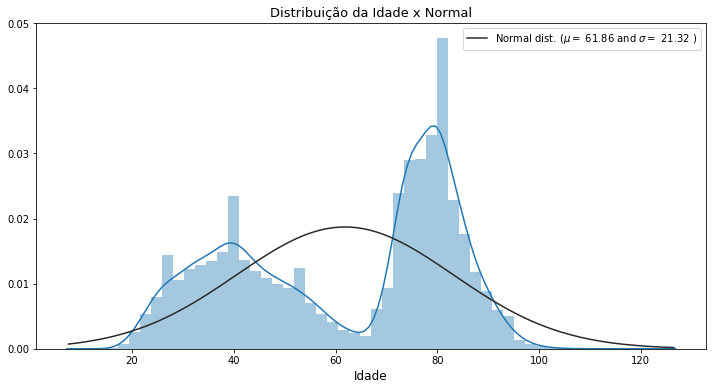

In [6]:
(mu, sigma) = norm.fit(df['paciente_idade'])

plt.figure(figsize = (12,6))
sns.distplot(df['paciente_idade'], kde = True, hist=True, fit = norm)
plt.title('Distribuição da Idade x Normal', fontsize = 13)
plt.xlabel("Idade", fontsize = 12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.show()

### Avaliando dados categóricos

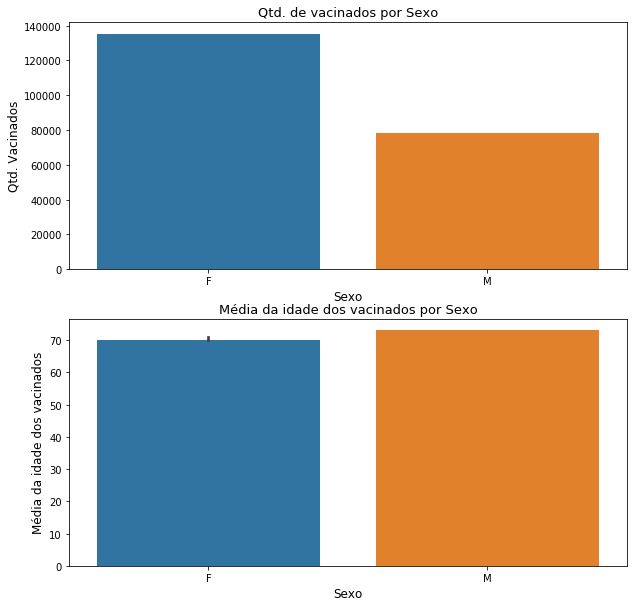

In [7]:
# Subplot pela quantidade

plt.figure(figsize = (10,10))

plt.subplot(211)
sns.countplot(x='paciente_enumSexoBiologico', data = df)
plt.title('Qtd. de vacinados por Sexo', fontsize = 13)
plt.xlabel('Sexo', fontsize = 12)
plt.ylabel('Qtd. Vacinados', fontsize = 12)

plt.subplot(212)
sns.barplot(x='paciente_enumSexoBiologico', y='paciente_idade', data = df, estimator = np.median)
plt.title('Média da idade dos vacinados por Sexo', fontsize = 13)
plt.xlabel('Sexo', fontsize = 12)
plt.ylabel('Média da idade dos vacinados', fontsize = 12)

plt.show()

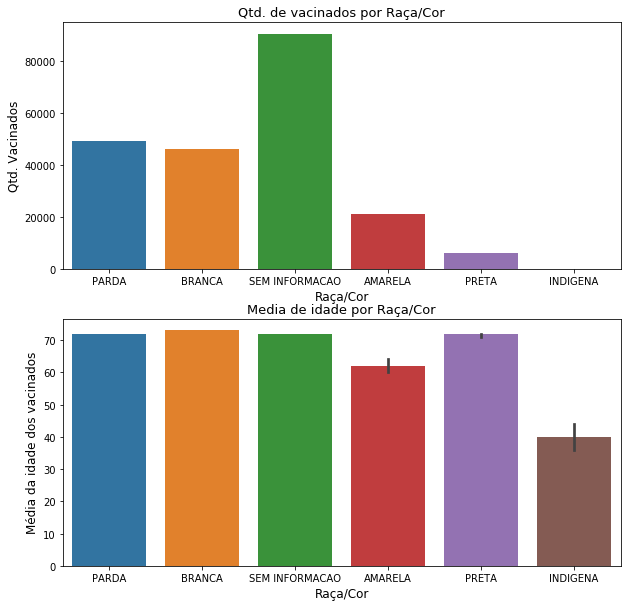

In [8]:
plt.figure(figsize = (10,10))

plt.subplot(211)
sns.countplot(x='paciente_racaCor_valor', data = df)
plt.title('Qtd. de vacinados por Raça/Cor', fontsize = 13)
plt.xlabel('Raça/Cor', fontsize = 12)
plt.ylabel('Qtd. Vacinados', fontsize = 12)

plt.subplot(212)
sns.barplot(x='paciente_racaCor_valor', y='paciente_idade', data = df, estimator = np.median)
plt.title('Media de idade por Raça/Cor', fontsize = 13)
plt.xlabel('Raça/Cor', fontsize = 12)
plt.ylabel('Média da idade dos vacinados', fontsize = 12)

plt.show()

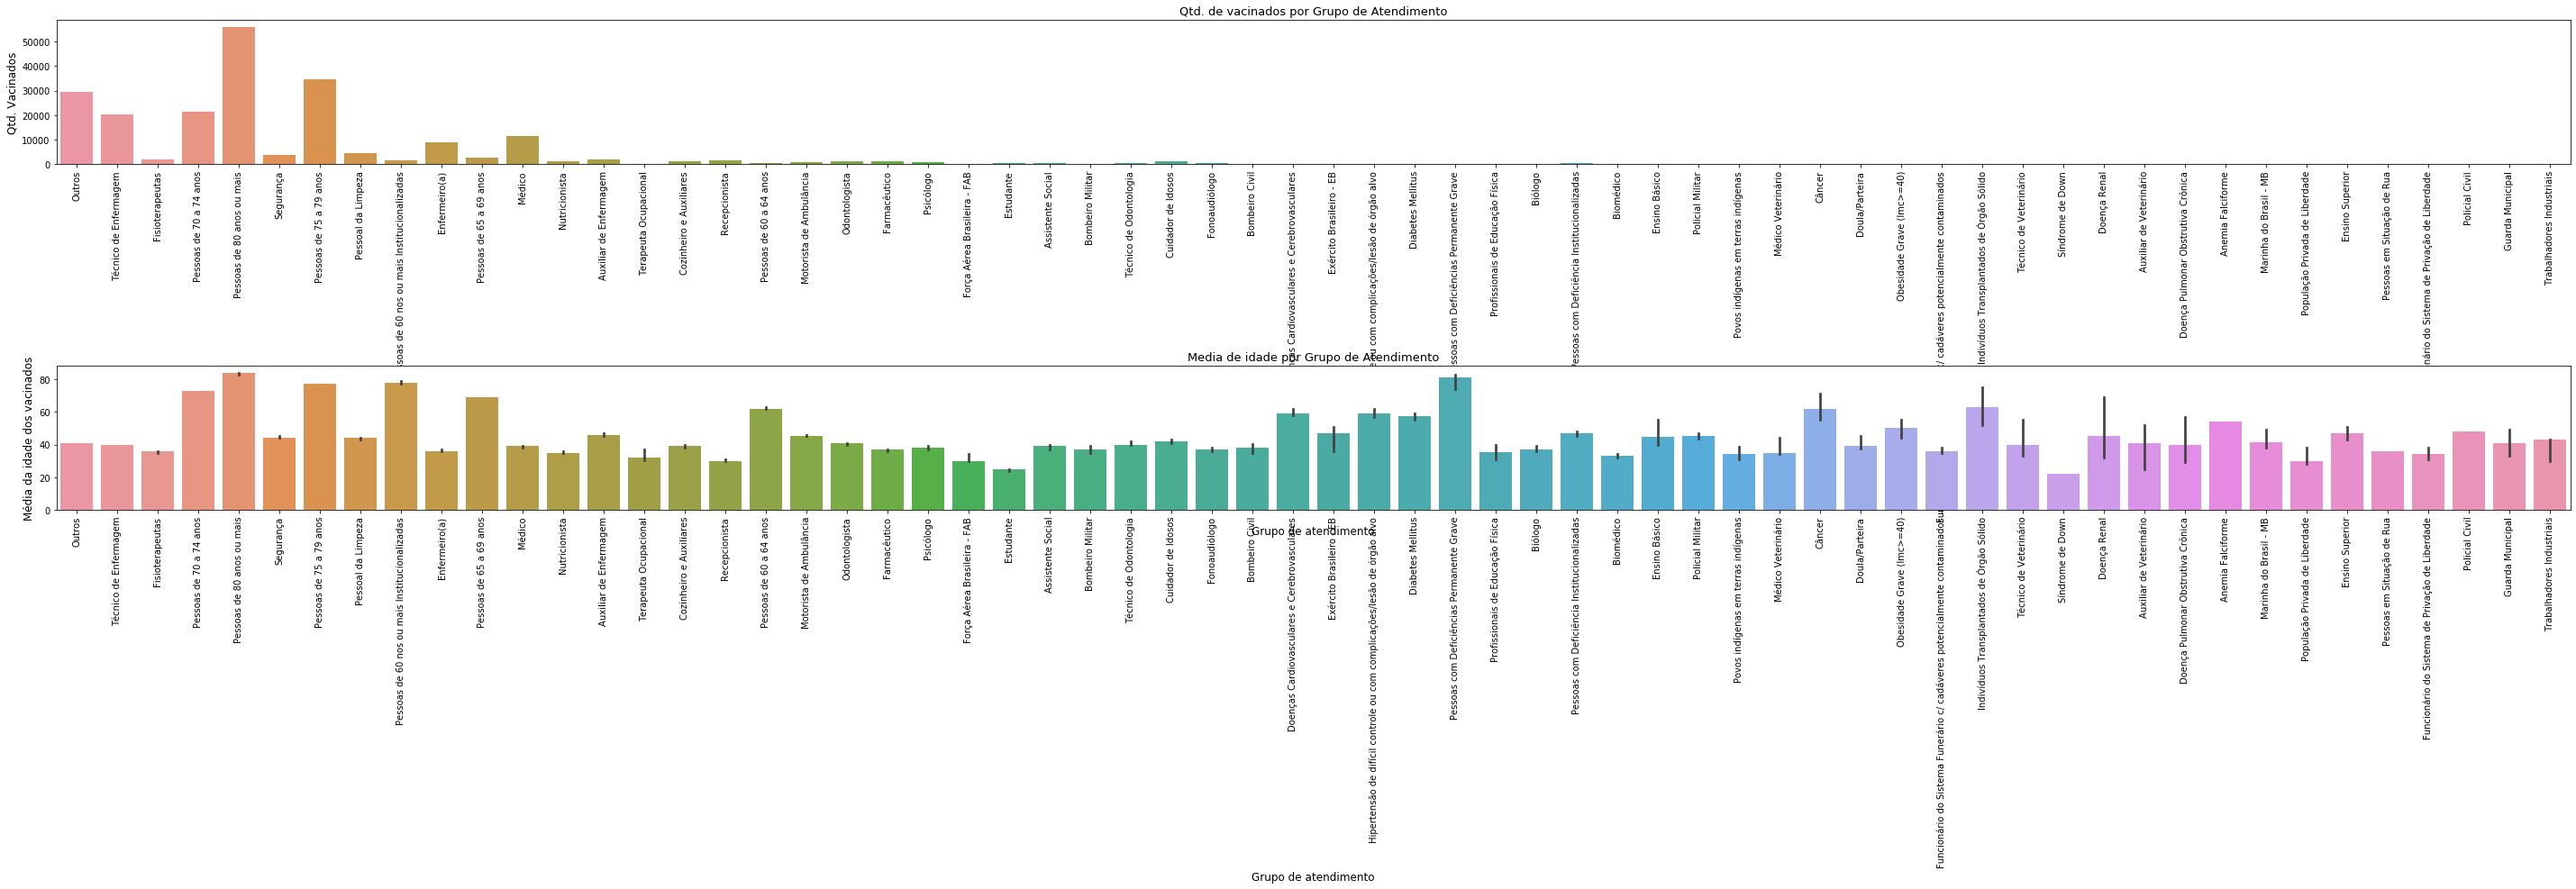

In [9]:
plt.figure(figsize = (50,10))
           
plt.subplot(311)
sns.countplot(x='vacina_grupoAtendimento_nome', data = df)
plt.title('Qtd. de vacinados por Grupo de Atendimento', fontsize = 13)
plt.xticks(rotation=90)
plt.xlabel('Grupo de atendimento', fontsize = 12)
plt.ylabel('Qtd. Vacinados', fontsize = 12)

plt.subplot(313)
sns.barplot(x='vacina_grupoAtendimento_nome', y='paciente_idade', data = df, estimator = np.median)
plt.title('Media de idade por Grupo de Atendimento', fontsize = 13)
plt.xticks(rotation=90)
plt.xlabel('Grupo de atendimento', fontsize = 12)
plt.ylabel('Média da idade dos vacinados', fontsize = 12)

plt.show()

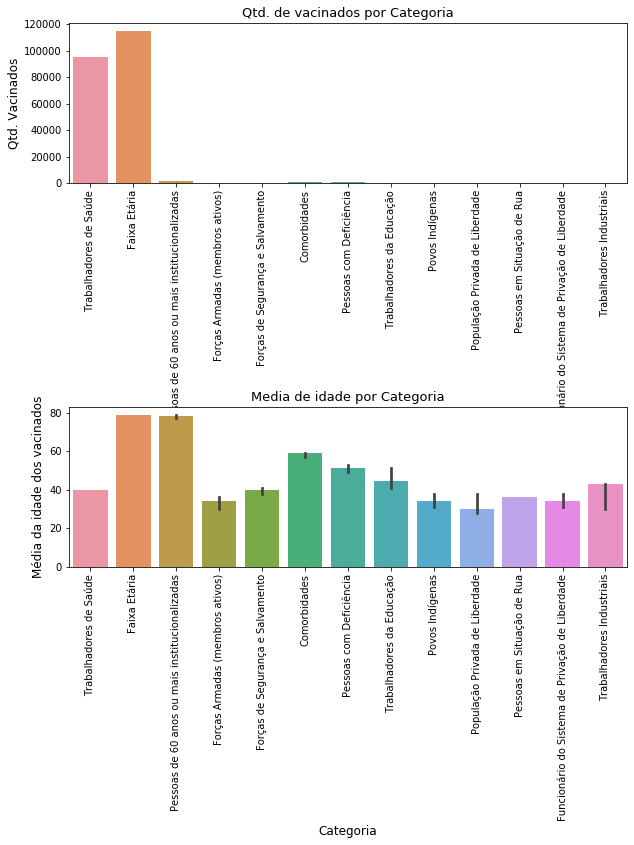

In [10]:
plt.figure(figsize = (10,10))

plt.subplot(311)
sns.countplot(x='vacina_categoria_nome', data = df)
plt.title('Qtd. de vacinados por Categoria', fontsize = 13)
plt.xticks(rotation=90)
plt.xlabel('Categoria', fontsize = 12)
plt.ylabel('Qtd. Vacinados', fontsize = 12)

plt.subplot(313)
sns.barplot(x='vacina_categoria_nome', y='paciente_idade', data = df, estimator = np.median)
plt.title('Media de idade por Categoria', fontsize = 13)
plt.xticks(rotation=90)
plt.xlabel('Categoria', fontsize = 12)
plt.ylabel('Média da idade dos vacinados', fontsize = 12)

plt.show()

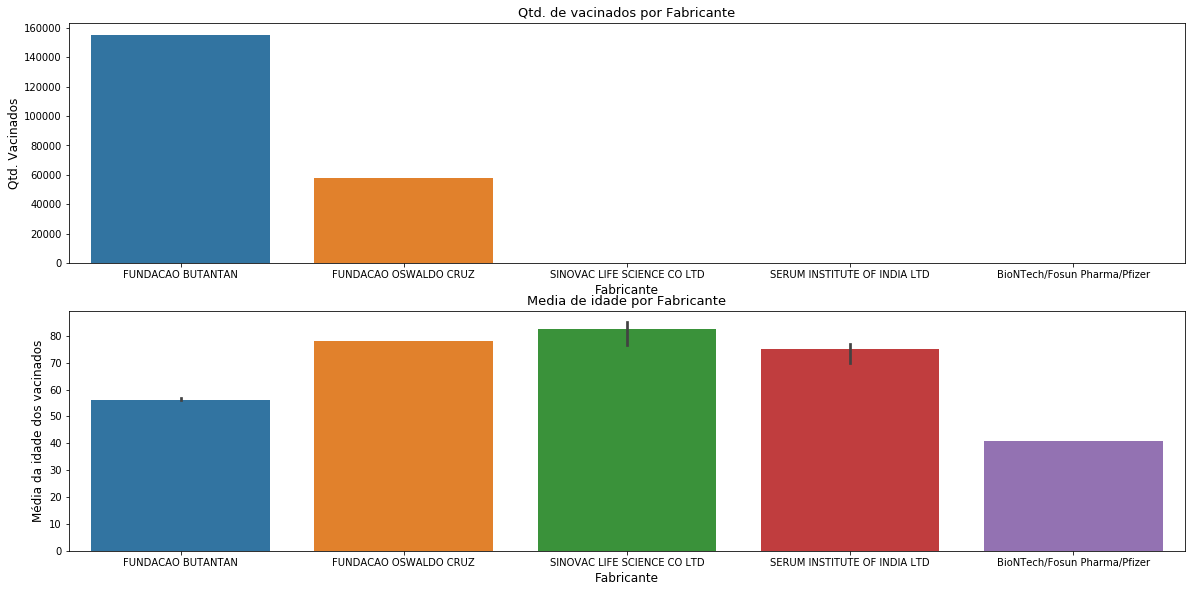

In [11]:
plt.figure(figsize = (20,15))

plt.subplot(311)
sns.countplot(x='vacina_fabricante_nome', data = df)
plt.title('Qtd. de vacinados por Fabricante', fontsize = 13)
plt.xlabel('Fabricante', fontsize = 12)
plt.ylabel('Qtd. Vacinados', fontsize = 12)

plt.subplot(312)
sns.barplot(x='vacina_fabricante_nome', y='paciente_idade', data = df, estimator = np.median)
plt.title('Media de idade por Fabricante', fontsize = 13)
plt.xlabel('Fabricante', fontsize = 12)
plt.ylabel('Média da idade dos vacinados', fontsize = 12)

plt.show()

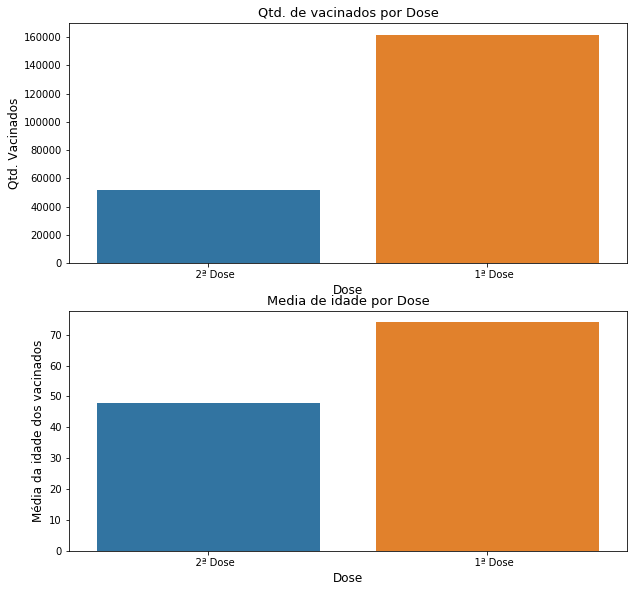

In [12]:
plt.figure(figsize = (10,15))

plt.subplot(311)
sns.countplot(x='vacina_descricao_dose', data = df)
plt.title('Qtd. de vacinados por Dose', fontsize = 13)
plt.xlabel('Dose', fontsize = 12)
plt.ylabel('Qtd. Vacinados', fontsize = 12)

plt.subplot(312)
sns.barplot(x='vacina_descricao_dose', y='paciente_idade', data = df, estimator = np.median)
plt.title('Media de idade por Dose', fontsize = 13)
plt.xlabel('Dose', fontsize = 12)
plt.ylabel('Média da idade dos vacinados', fontsize = 12)

plt.show()

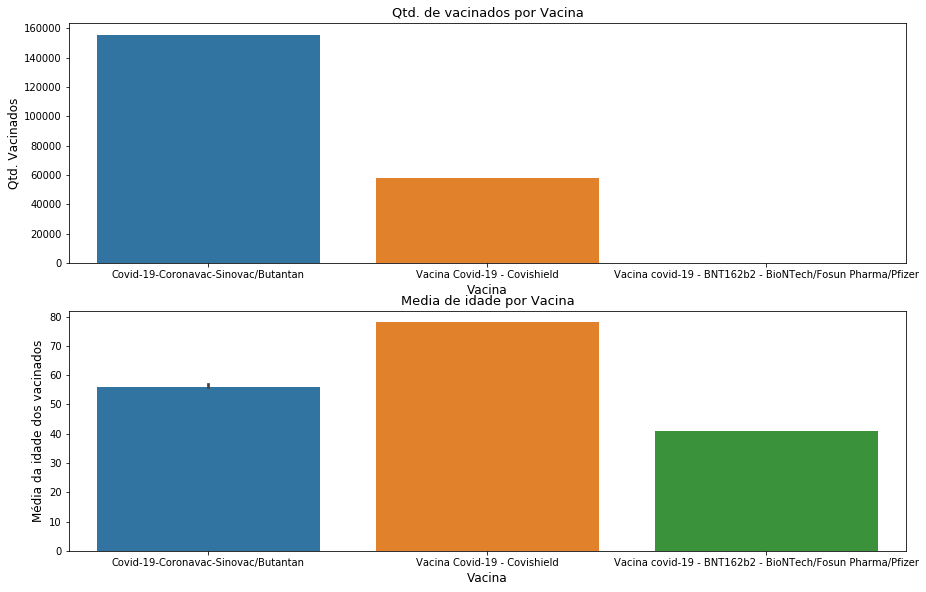

In [13]:
plt.figure(figsize = (15,15))

plt.subplot(311)
sns.countplot(x='vacina_nome', data = df)
plt.title('Qtd. de vacinados por Vacina', fontsize = 13)
plt.xlabel('Vacina', fontsize = 12)
plt.ylabel('Qtd. Vacinados', fontsize = 12)

plt.subplot(312)
sns.barplot(x='vacina_nome', y='paciente_idade', data = df, estimator = np.median)
plt.title('Media de idade por Vacina', fontsize = 13)
plt.xlabel('Vacina', fontsize = 12)
plt.ylabel('Média da idade dos vacinados', fontsize = 12)

plt.show()

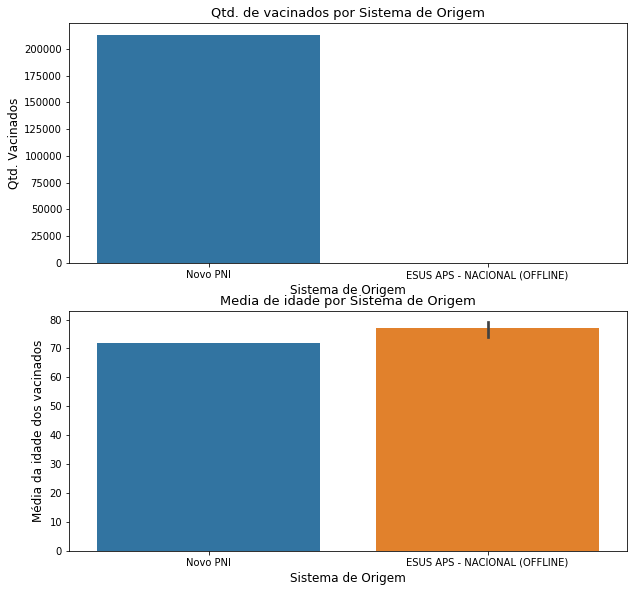

In [14]:
plt.figure(figsize = (10,15))

plt.subplot(311)
sns.countplot(x='sistema_origem', data = df)
plt.title('Qtd. de vacinados por Sistema de Origem', fontsize = 13)
plt.xlabel('Sistema de Origem', fontsize = 12)
plt.ylabel('Qtd. Vacinados', fontsize = 12)

plt.subplot(312)
sns.barplot(x='sistema_origem', y='paciente_idade', data = df, estimator = np.median)
plt.title('Media de idade por Sistema de Origem', fontsize = 13)
plt.xlabel('Sistema de Origem', fontsize = 12)
plt.ylabel('Média da idade dos vacinados', fontsize = 12)

plt.show()

### Avaliando de vacinados por estabelecimento

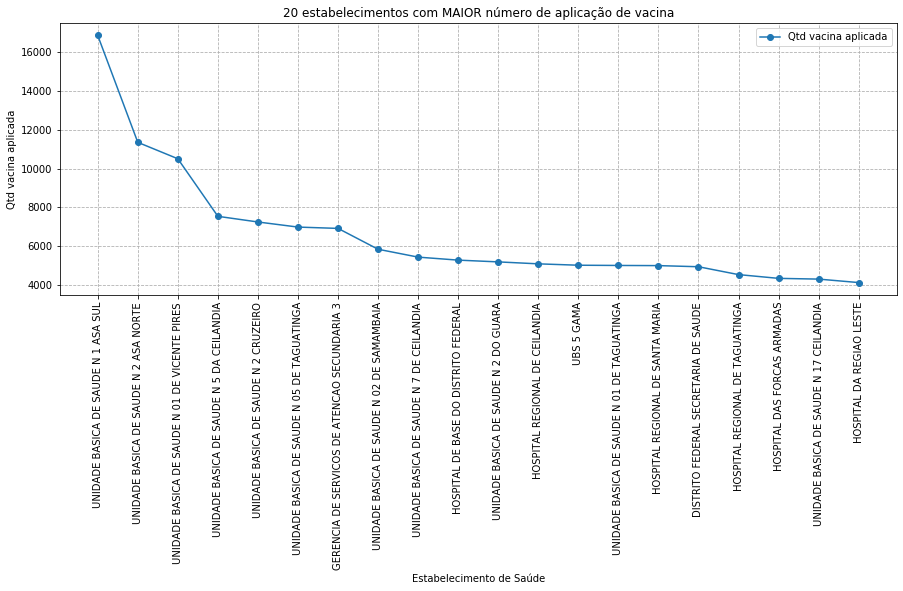

In [20]:
df_estabelecimentos = df.groupby(['estabelecimento_razaoSocial']).count().nlargest(20, 'paciente_idade')

# Gerando o plot dos 20 estabelecimentos com maior número de aplicação de vacina
plt.subplots(figsize=(15,5))
plt.grid(True, linestyle='--')
plt.title('20 estabelecimentos com MAIOR número de aplicação de vacina')
plt.plot(df_estabelecimentos.index, df_estabelecimentos['paciente_idade'], label='Qtd vacina aplicada', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Estabelecimento de Saúde')
plt.ylabel('Qtd vacina aplicada')
plt.legend()
plt.show()

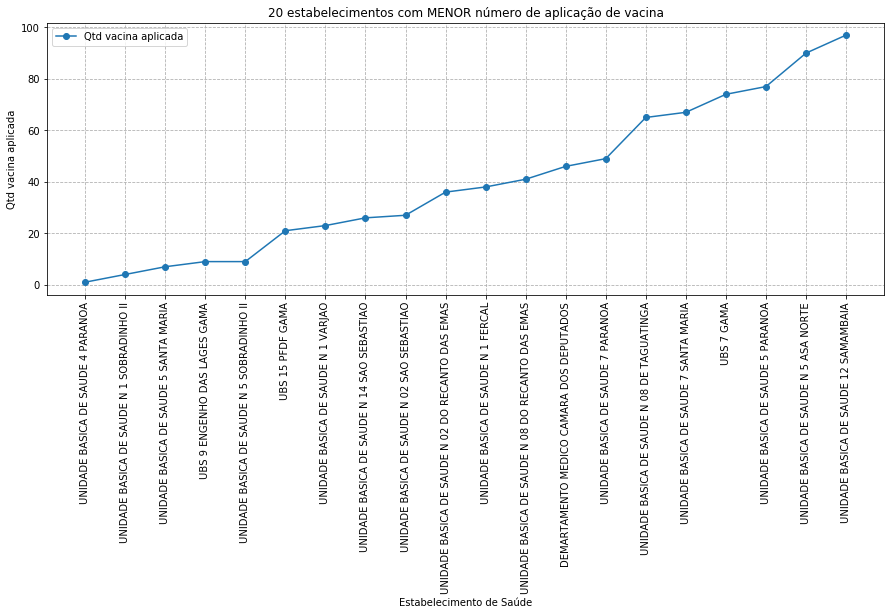

In [21]:
df_estabelecimentos = df.groupby(['estabelecimento_razaoSocial']).count().nsmallest(20, 'paciente_idade')

# Gerando o plot dos 20 estabelecimentos com menor número de aplicação de vacina
plt.subplots(figsize=(15,5))
plt.grid(True, linestyle='--')
plt.title('20 estabelecimentos com MENOR número de aplicação de vacina')
plt.plot(df_estabelecimentos.index, df_estabelecimentos['paciente_idade'], label='Qtd vacina aplicada', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Estabelecimento de Saúde')
plt.ylabel('Qtd vacina aplicada')
plt.legend()
plt.show()

### Avaliando agrupamentos

Quantidade de pessoas vacinadas por Raça/Cor e sexo biológico

In [17]:
df.groupby(['paciente_racaCor_valor', 'paciente_enumSexoBiologico'])['paciente_enumSexoBiologico'].agg(['count']).rename_axis(["Raca/Cor", "Sexo"])

count
Raca/Cor       Sexo       
AMARELA        F     13808
               M      7450
BRANCA         F     30748
               M     15429
INDIGENA       F        96
               M        51
PARDA          F     30964
               M     18368
PRETA          F      3851
               M      2478
SEM INFORMACAO F     55781
               M     34436

Quantidade de doses aplicadas por Raça/Cor e sexo biológico

In [18]:
df.groupby(['paciente_racaCor_valor', 'paciente_enumSexoBiologico', 'vacina_descricao_dose'])['vacina_descricao_dose'].agg(['count']).rename_axis(["Raca/Cor", "Sexo", "Dose"])

count
Raca/Cor       Sexo Dose              
AMARELA        F        1ª Dose  10204
                        2ª Dose   3604
               M        1ª Dose   5612
                        2ª Dose   1838
BRANCA         F        1ª Dose  23228
                        2ª Dose   7520
               M        1ª Dose  11866
                        2ª Dose   3563
INDIGENA       F        1ª Dose     63
                        2ª Dose     33
               M        1ª Dose     37
                        2ª Dose     14
PARDA          F        1ª Dose  23373
                        2ª Dose   7591
               M        1ª Dose  14149
                        2ª Dose   4219
PRETA          F        1ª Dose   2919
                        2ª Dose    932
               M        1ª Dose   1916
                        2ª Dose    562
SEM INFORMACAO F        1ª Dose  42033
                        2ª Dose  13748
               M        1ª Dose  26478
                        2ª Dose   7958

Quantidade de vacinado por Dose e Faixa Etária

In [6]:
df.groupby(['paciente_idade', 'vacina_descricao_dose'])['vacina_descricao_dose'].agg(['count']).rename_axis(["Idade", "Dose"])

count
Idade Dose              
13        1ª Dose      1
15        1ª Dose      2
          2ª Dose      2
16        1ª Dose      3
          2ª Dose      1
...                  ...
111       1ª Dose      1
          2ª Dose      1
112       1ª Dose      1
121       1ª Dose      6
          2ª Dose      2

[196 rows x 1 columns]

In [29]:
df_temp = df.groupby(['paciente_idade', 'vacina_descricao_dose'])['vacina_descricao_dose'].agg(['count']).sort_values(['paciente_idade']).rename_axis(["FaixaEtaria", "Dose"])
df_temp

count
FaixaEtaria Dose              
13              1ª Dose      1
15              1ª Dose      2
                2ª Dose      2
16              1ª Dose      3
                2ª Dose      1
...                        ...
111             1ª Dose      1
                2ª Dose      1
112             1ª Dose      1
121             1ª Dose      6
                2ª Dose      2

[196 rows x 1 columns]

In [30]:
df_temp.reset_index() 

,FaixaEtaria,Dose,count
0,13,1ª Dose,1
1,15,1ª Dose,2
2,15,2ª Dose,2
3,16,1ª Dose,3
4,16,2ª Dose,1
...,...,...,...
191,111,1ª Dose,1
192,111,2ª Dose,1
193,112,1ª Dose,1
194,121,1ª Dose,6
